In [1]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
def read_file(filename):
    with open(filename, "r") as fp:
        lines = fp.readlines()
    data = {}
    for line in lines[1:]:
        tokens = line.strip().split(',')
        method, bs, e2e, requests = tokens[0], int(tokens[1]), tokens[6], tokens[7]
        req_lat = [float(_) for _ in requests.split('+')]
        if 'nan' in e2e:
            req_lat = [0]
        data[(method, bs)] = (e2e, sum(req_lat)/len(req_lat), req_lat)
    return data

In [3]:
data = read_file('shared_prompt_exp_1.csv')

In [4]:
data

{('vllm_shared', 480): (' 276.354150068',
  57.56610881413844,
  [59.719856786,
   59.720069695,
   59.720369738,
   59.720947902,
   59.721395802,
   59.72184229,
   59.72233834,
   59.722904021,
   59.723786005,
   59.724415376,
   59.725147529,
   59.725864394,
   59.726664846,
   59.727648099,
   59.728677981,
   59.729932755,
   59.731090968,
   59.732403329,
   59.733462485,
   59.734695289,
   59.736118207,
   59.737522321,
   59.739072008,
   59.740376484,
   59.741743758,
   59.743215329,
   59.744565481,
   59.74588167,
   59.747687257,
   59.749386334,
   59.750904882,
   59.752831306,
   59.754718085,
   59.756631554,
   59.758792908,
   59.76104959,
   59.763018593,
   59.765081083,
   59.766882581,
   59.770764463,
   59.773197917,
   59.777067005,
   59.779581692,
   59.781875654,
   59.784573685,
   59.787423319,
   59.790459013,
   59.793009057,
   59.79594865,
   59.79987229,
   59.79316508,
   59.796683389,
   59.800425628,
   59.803670395,
   59.806729282,
   59.811

In [22]:

olens = [100,200,300,400,480]
systems = ['parrot_shared', 'vllm_shared',]
hatches = ['', '\\', '/', 'x']
colors = [
"#d73027",
# "#fee090",
# "#91bfdb",
"#4575b4"]
symbols = ['o', 'v']

100 0.17790629114854667
200 0.13989224460998273
300 0.12779604636700115
400 0.12244584174999132
480 0.11992939336278842


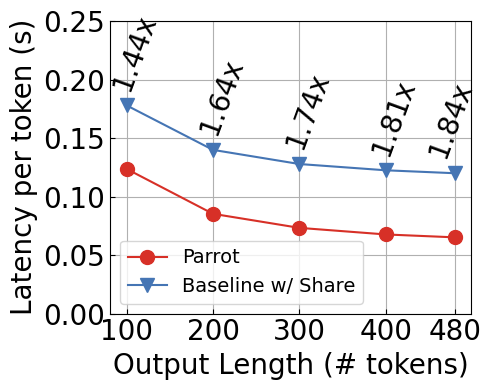

In [48]:

names = {
    'parrot_shared': 'Parrot',
    'vllm_shared': 'Baseline w/ Share'
}

# Generate the chart
x = np.arange(len(olens))
width = 0.25

fig, ax = plt.subplots(1, 1, figsize=(5,4))

plt.grid(True)
rects = []
for i, system in enumerate(systems):
    rect = ax.plot(olens, [data[(system,ol)][1]/ol for ol in olens], markersize=10, marker=symbols[i], color=colors[i], label=names[system],zorder=3) # hatches
    rects.append(rect)

    if system == 'parrot_shared':
        continue
    speedup_values = [data[(system,ol)][1]/data[('parrot_shared',ol)][1] for ol in olens]
    for sid, speedup in enumerate(speedup_values):
        
        height = data[(system, olens[sid])][1]/olens[sid]
        print(olens[sid], height)
        if sid == 4:
            diff = -5
        else:
            diff = 10
        ax.text(olens[sid]+diff, height+0.01,
                '{:.2f}x'.format(speedup),
                ha='center', va='bottom', rotation=70,
                fontsize=20)

# plt.legend(loc='upper left', prop = { "size": 18 },)
ax.tick_params(axis='y', labelsize=20, direction='in')
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.set_xlabel('Output Length (# tokens)', fontsize=20)
ax.set_ylabel('Latency per token (s)', fontsize=20)
plt.legend(loc='lower left', prop = { "size": 14 }) #, bbox_to_anchor= (0., 0.97))
plt.xticks([100,200,300,400,480])
plt.ylim([0,0.25])

plt.tight_layout()
plt.savefig('share_olen_bs64.pdf')